In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras==2.12.0 tensorflow==2.12.0
!pip install tensorflow-addons

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.6 MB/s eta 0:00:00
  Atte

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [2]:
!pip uninstall -y tensorflow keras tensorflow-addons numpy
!pip install tensorflow==2.12.0
!pip install tensorflow-addons
!pip install keras==2.12.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

  Using cached tensorflow_addons-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl.metadata (3.6 kB)
Using cached tensorflow_addons-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import collections

import os
print(os.listdir("/content/drive/MyDrive/test (1)"))

print("TensorFlow Version:", tf.__version__)

['MildDemented', 'VeryMildDemented', 'NonDemented', 'ModerateDemented']
TensorFlow Version: 2.12.0


In [2]:
!pip install split-folders
import splitfolders

input_file = "/content/drive/MyDrive/test (1)"
output_file = "/content/drive/MyDrive/test (1)_splitted"

splitfolders.ratio(input_file, output=output_file, seed=1345, ratio=(0.8, 0.1, 0.1), group_prefix=None)

Copying files: 1279 files [06:10,  3.45 files/s]


In [3]:
# Add this cell after the existing imports
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Constants (same as before)
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 50

# Data loading (same as before)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/train",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/val",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/test",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print(class_names)

Found 1022 files belonging to 4 classes.
Found 126 files belonging to 4 classes.
Found 131 files belonging to 4 classes.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [4]:
print(os.path.exists(output_file))
print(os.listdir(output_file))

True
['train', 'val', 'test']


In [5]:
# Custom JSON encoder to handle TensorFlow tensors
import json
class TensorEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, tf.Tensor):
            return obj.numpy().tolist()
        return super().default(obj)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_addons as tfa

# Constants
IMG_HEIGHT = 224  # Increased for better feature extraction
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 50

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/train",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/test",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/val",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64
)


/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

Found 1022 files belonging to 4 classes.
Found 131 files belonging to 4 classes.
Found 126 files belonging to 4 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)
train_ds

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

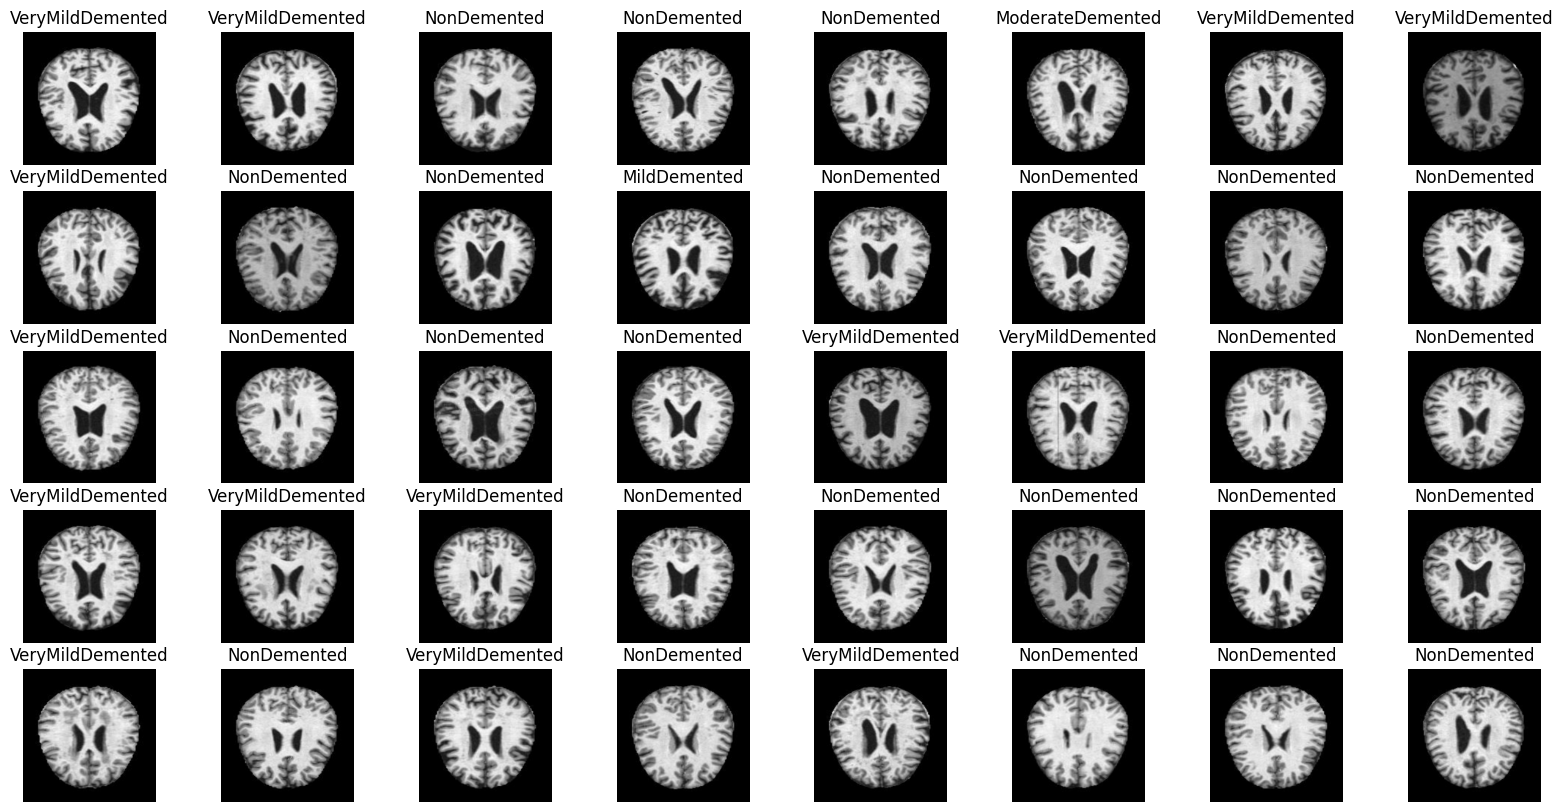

In [ ]:
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
    for i in range(40):
        ax = plt.subplot(5, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

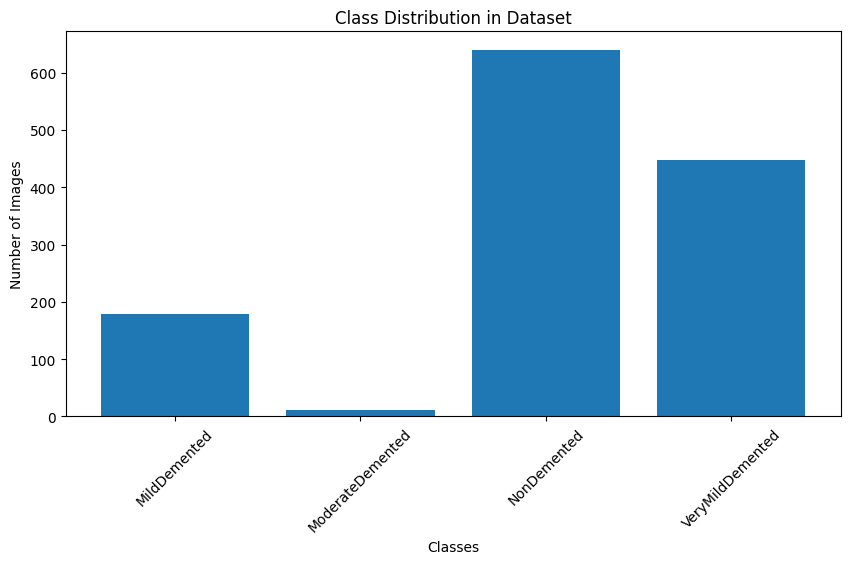

In [ ]:
# Visualize class distribution
plt.figure(figsize=(10, 5))
class_counts = []
for class_name in class_names:
    class_path = os.path.join("/content/drive/MyDrive/test (1)", class_name)
    class_counts.append(len(os.listdir(class_path)))

plt.bar(class_names, class_counts)
plt.title('Class Distribution in Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Get class distribution from train_ds
y_train = np.concatenate([y for x, y in train_ds], axis=0)
class_counts = collections.Counter(y_train)
print("Class distribution:", class_counts)

Class distribution: Counter({2: 512, 3: 358, 0: 143, 1: 9})


In [9]:
from sklearn.utils import class_weight
import numpy as np

# Get class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

Class weights: {0: 1.7867132867132867, 1: 28.38888888888889, 2: 0.4990234375, 3: 0.7136871508379888}


In [10]:
# 1. Identify minority classes (adjust threshold as needed)
minority_classes = [k for k, v in class_counts.items() if v < max(class_counts.values()) // 2]

# 2. Calculate repeat factors (oversample minority classes 5-10x)
repeat_factors = {cls: 10 if cls in minority_classes else 1 for cls in class_counts.keys()}

# 3. Create oversampling function
def oversample_and_augment(image, label):
    # Convert label to numpy for comparison
    label_np = label.numpy() if label.dtype != tf.int64 else label

    # Apply augmentation ONLY to minority classes
    if label_np in minority_classes:
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_brightness(image, 0.3)
        image = tf.image.random_contrast(image, 0.7, 1.3)
        image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    return image, label

# 4. Create new dataset with oversampling
def create_balanced_dataset(dataset):
    datasets = []
    for cls in class_counts.keys():
        # Filter dataset by class
        cls_ds = dataset.unbatch().filter(lambda x, y: tf.equal(y, cls))

        # Repeat minority classes
        if cls in minority_classes:
            cls_ds = cls_ds.repeat(repeat_factors[cls])

        datasets.append(cls_ds)

    # Combine and shuffle
    balanced_ds = tf.data.Dataset.sample_from_datasets(datasets)
    return balanced_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# 5. Apply to your training data
balanced_train_ds = create_balanced_dataset(train_ds)

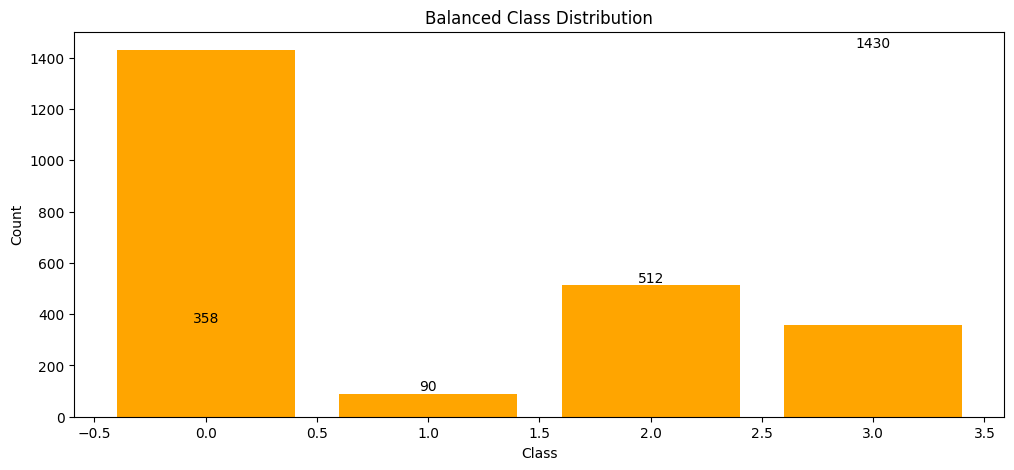

In [ ]:
# Check new distribution
balanced_labels = np.concatenate([y.numpy() for _, y in balanced_train_ds], axis=0)
balanced_counts = collections.Counter(balanced_labels)

# Plot comparison
plt.figure(figsize=(12, 5))
plt.bar(balanced_counts.keys(), balanced_counts.values(), color='orange')
plt.title('Balanced Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
for i, v in enumerate(balanced_counts.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [11]:
# TARGET: Balance all classes to match the original majority class (512)
target_count = 512  # Or set this to max(class_counts.values())

repeat_factors = {
    0: int(target_count / class_counts[0]),  # 512/143 ≈ 3.5 → 4x
    1: int(target_count / class_counts[1]),   # 512/9 ≈ 57x (too aggressive, cap at 20x)
    2: 1,  # Majority class - no oversampling
    3: int(target_count / class_counts[3])   # 512/358 ≈ 1.5 → 2x
}

# Cap extreme oversampling to avoid noise
repeat_factors[1] = min(repeat_factors[1], 20)  # Max 20x for Class 1

In [12]:
def augment_minority(image, label):
    label_np = label.numpy()

    # Only augment minority classes (0, 1, 3)
    if label_np in [0, 1, 3]:
        # Strong augmentations for Class 1 (very rare)
        if label_np == 1:
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_brightness(image, 0.4)
            image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
            image = tf.image.random_jpeg_quality(image, 70, 100)
            image = tf.image.random_hue(image, 0.3)  # Add color distortion
            image = tf.image.random_shear(image, 0.3)  # Add shear

        # Moderate augmentations for other minorities
        else:
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_brightness(image, 0.2)

    return image, label

In [13]:
from imblearn.over_sampling import ADASYN

# Constants (update these if needed)
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
BATCH_SIZE = 32

# Step 1: Unbatch the dataset once and extract X and y
X_list = []
y_list = []

for x, y in train_ds.unbatch():
    X_list.append(x.numpy())
    y_list.append(y.numpy())

X_train = np.stack(X_list, axis=0)
y_train = np.array(y_list)

# OPTIONAL: If y_train is one-hot encoded, convert to integer labels
# Uncomment the next line if needed
# y_train = np.argmax(y_train, axis=1)

# Step 2: Flatten the image data for ADASYN
X_flat = X_train.reshape(X_train.shape[0], -1)

# Step 3: Apply ADASYN to oversample only Class 1 to 500 samples
adasyn = ADASYN(sampling_strategy={1: 500}, random_state=42)
X_res, y_res = adasyn.fit_resample(X_flat, y_train)

# Step 4: Reshape back to image format
X_balanced = X_res.reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

# Step 5: Convert back to tf.data.Dataset
balanced_ds = tf.data.Dataset.from_tensor_slices((X_balanced, y_res))
balanced_ds = balanced_ds.shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


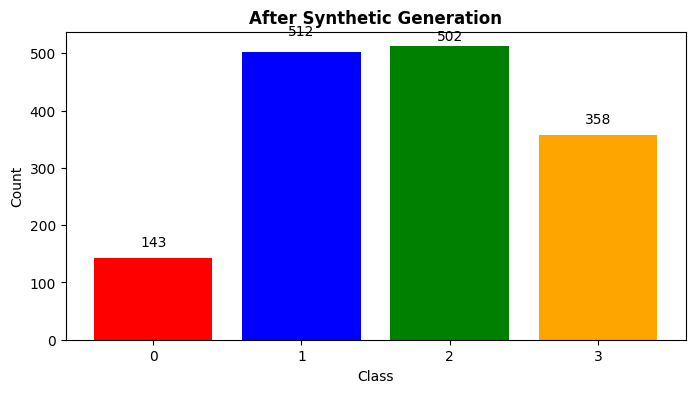

In [ ]:
new_counts = collections.Counter(y_res)
plt.figure(figsize=(8, 4))
plt.bar(new_counts.keys(), new_counts.values(), color=['red', 'green', 'blue', 'orange'])
plt.title('After Synthetic Generation', fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(new_counts.keys()))
for i, v in enumerate(new_counts.values()):
    plt.text(i, v+20, str(v), ha='center')
plt.show()

In [14]:
y_train = np.concatenate([y for x, y in balanced_ds], axis=0)
class_counts = collections.Counter(y_train)
print("Class distribution:", class_counts)

Class distribution: Counter({2: 512, 1: 502, 3: 358, 0: 143})


In [15]:
# Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
])

In [16]:
def get_class_weights(dataset):
    class_counts = {}
    for _, labels in dataset.unbatch():
        label = int(labels.numpy())  # ensure Python int
        class_counts[label] = class_counts.get(label, 0) + 1

    total_samples = sum(class_counts.values())
    num_classes = len(class_counts)

    class_weights = {
        int(i): float(total_samples / (num_classes * count))
        for i, count in class_counts.items()
    }

    return class_weights
class_weights = get_class_weights(balanced_ds)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from sklearn.utils import class_weight

# Constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 50
BATCH_SIZE = 32

# 1. Load and preprocess dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/train",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/val",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# 2. Calculate class weights (using numpy arrays)
y_train = np.concatenate([y for x, y in train_ds], axis=0)
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: float(weight) for i, weight in enumerate(class_weights)}  # Convert to Python floats
print("Class weights:", class_weights)

# 3. Build Model
def build_model():
    base_model = EfficientNetB0(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )
    base_model.trainable = False

    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)
    x = base_model(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.3)(x)
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)
]


# 5. Train with class weights
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    class_weight=class_weights  # Using serializable weights
)

# 6. Fine-tuning (optional)
model.layers[1].trainable = True  # Unfreeze EfficientNet
for layer in model.layers[1].layers[:100]:  # Freeze first 100 layers
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS + 10,
    callbacks=callbacks,
    class_weight=class_weights,
    initial_epoch=history.epoch[-1] + 1
)

Found 1022 files belonging to 4 classes.
Found 126 files belonging to 4 classes.
Class weights: {0: 1.7867132867132867, 1: 28.38888888888889, 2: 0.4990234375, 3: 0.7136871508379888}
Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 5.7774 - accuracy: 0.3415

32/32 [==============================] - 159s 5s/step - loss: 5.7774 - accuracy: 0.3415 - val_loss: 5.2420 - val_accuracy: 0.4603
Epoch 2/50
32/32 [==============================] - 80s 2s/step - loss: 5.4609 - accuracy: 0.3170 - val_loss: 5.1378 - val_accuracy: 0.4048
Epoch 3/50
32/32 [==============================] - 83s 3s/step - loss: 5.3299 - accuracy: 0.3249 - val_loss: 5.0154 - val_accuracy: 0.4841
Epoch 4/50
32/32 [==============================] - 80s 2s/step - loss: 5.1380 - accuracy: 0.3063 - val_loss: 4.9161 - val_accuracy: 0.3889
Epoch 5/50
32/32 [==============================] - 81s 3s/step - loss: 4.9541 - accuracy: 0.3650 - val_loss: 4.7459 - val_accuracy: 0.4921
Epoch 6/50
32/32 [==============================] - 86s 3s/step - loss: 4.8089 - accuracy: 0.3503 - val_loss: 4.6855 - val_accuracy: 0.4206
Epoch 7/50
32/32 [==============================] - 83s 3s/step - loss: 4.7756 - accuracy: 0.3170 - val_loss: 4.5702 - val_accuracy: 0.4444
Epoch 8/50
32/32 [============

In [ ]:
# 5. Evaluation
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.2%}")

3/3 [==============================] - 9s 2s/step - loss: 2.2453 - accuracy: 0.5649

Test Accuracy: 56.49%


In [ ]:
for images, labels in train_ds.take(1):
    print(labels.shape)
    print(labels.numpy())


(32,)
[3 2 3 3 3 1 0 2 2 2 2 3 2 2 3 2 2 3 2 2 3 2 0 2 2 2 2 0 3 3 2 2]


In [17]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
from collections import Counter
from imblearn.over_sampling import ADASYN

# Constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 50
BATCH_SIZE = 32
NUM_CLASSES = 4

# 1. Data Loading with Preprocessing
def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.keras.applications.resnet.preprocess_input(image)
    return image, label

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/train",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
).map(preprocess).cache().prefetch(tf.data.AUTOTUNE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/test (1)_splitted/val",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
).map(preprocess).cache().prefetch(tf.data.AUTOTUNE)

# 2. Calculate steps
steps_per_epoch = len(train_ds)
validation_steps = len(val_ds)

# 3. Improved Model Architecture
def build_improved_model():
    base_model = ResNet50(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)  # Now properly imported
    x = Dropout(0.3)(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model, base_model

# 4. Training
model, base_model = build_improved_model()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
]

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)

Found 1022 files belonging to 4 classes.
Found 126 files belonging to 4 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/50
32/32 [==============================] - 258s 8s/step - loss: 6.5422 - accuracy: 0.2476 - val_loss: 5.6418 - val_accuracy: 0.4206 - lr: 1.0000e-04
Epoch 2/50
32/32 [==============================] - 232s 7s/step - loss: 6.0406 - accuracy: 0.2984 - val_loss: 5.3467 - val_accuracy: 0.5079 - lr: 1.0000e-04
Epoch 3/50
32/32 [==============================] - 228s 7s/step - loss: 5.6834 - accuracy: 0.3552 - val_loss: 5.0878 - val_accuracy: 0.5873 - lr: 1.0000e-04
Epoch 4/50
32/32 [==============================] - 230s 7s/step - loss: 5.4115 - accuracy: 0.3532 - val_loss: 4.8524 - val_accuracy: 0.5873 - lr: 1.0000e-04
Epoch 5/50
32/32 [==============================] - 229s 7s/step - loss: 5.2107 - accuracy: 0.3757 - val_loss: 4.7023 - val_accuracy: 0.5556 - lr: 1.0000e-04
Epoch 6/50
32/32 [==============================] - 245s 8s/step

In [18]:
# Print final training and validation accuracy for ResNet50
final_train_acc_resnet = history.history['accuracy'][-1]
final_val_acc_resnet = history.history['val_accuracy'][-1]

print(f"ResNet50 Final Training Accuracy: {final_train_acc_resnet:.4f}")
print(f"ResNet50 Final Validation Accuracy: {final_val_acc_resnet:.4f}")


ResNet50 Final Training Accuracy: 0.6213
ResNet50 Final Validation Accuracy: 0.6984


In [ ]:
# from tensorflow.keras.applications import VGG16

# # Load VGG16 base model
# base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model_vgg.trainable = False

# # Add custom layers
# y = base_model_vgg.output
# y = GlobalAveragePooling2D()(y)
# y = Dense(512, activation='relu')(y)
# predictions_vgg = Dense(4, activation='softmax')(y)

# # Final model
# model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions_vgg)

# # Compile
# model_vgg.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train
# history_vgg = model_vgg.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=EPOCHS,
#     callbacks=callbacks,
#     class_weight=class_weights
# )


In [ ]:
# # Print final training and validation accuracy for VGG16
# final_train_acc_vgg = history_vgg.history['accuracy'][-1]
# final_val_acc_vgg = history_vgg.history['val_accuracy'][-1]

# print(f"VGG16 Final Training Accuracy: {final_train_acc_vgg:.4f}")
# print(f"VGG16 Final Validation Accuracy: {final_val_acc_vgg:.4f}")


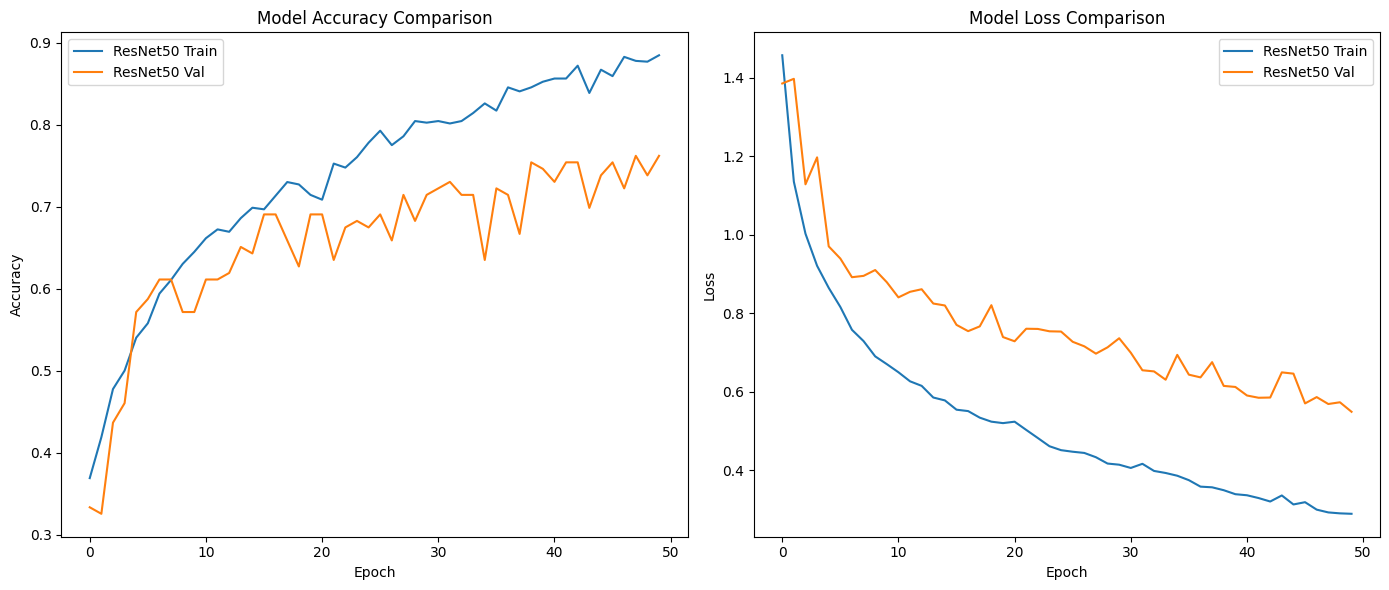

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

# plt.plot(history.history['accuracy'], label='EfficientNet Train')
# plt.plot(history.history['val_accuracy'], label='EfficientNet Val')

plt.plot(history_resnet.history['accuracy'], label='ResNet50 Train')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 Val')

# plt.plot(history_vgg.history['accuracy'], label='VGG16 Train')
# plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Val')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)

# plt.plot(history.history['loss'], label='EfficientNet Train')
# plt.plot(history.history['val_loss'], label='EfficientNet Val')

plt.plot(history_resnet.history['loss'], label='ResNet50 Train')
plt.plot(history_resnet.history['val_loss'], label='ResNet50 Val')

# plt.plot(history_vgg.history['loss'], label='VGG16 Train')
# plt.plot(history_vgg.history['val_loss'], label='VGG16 Val')

plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()
